## 1. Set up Environment

### 1. a. Import Libraries

In [3]:
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

### 1.b. Load data 

In [4]:
inputfile = 'Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(inputfile)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 1.c. Data overview

Target Column
* PL - Is out target columns. 

Features
* ID - Is it relavant for the ML model as its a continuous number...  
* Age - Numeric field and is very important columns for the model. 
* Experience - Numeric field and is very important if the customer can afford for a personal loan. 
* Income - Numeric. Also a relavant columns that determines if a person would be interested on a loan. 
* Zip - Currently numeric 
* Family - Currently numeric needs to be a categorical value. 
* CCAvg - Numeric float, 
* Education - Numeric 
 



In [5]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a193fe950>]],
      dtype=object)

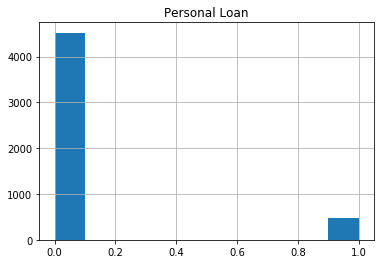

In [6]:
df.hist(column = 'Personal Loan')

## 2.  Exploratory Data Analysis

### 2.a. Elementary Statistics

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### 2.b. Pair plot to understand relationship
1.  Age - good normal distribution and no outliers. 
2. Experience - is a good datapoint to consider however there are outliers. The value -3 cannot be a good number for experience. Experience will be atleast 0 or above. Going by min approach, if the value is less than 0 then keep it as 0. 
3. Income - Skewed data. Candidate for a feature as it is one of the primary factor 
4. Family - There are 4 categories with no details on each category 
5. Zipcode - There is no business case describing the significance of zip code 
6. CCAvg - If this is a number that signifies credit rating for a customer, then yes a good candidate for loan consideration. Will include it as a catagorical feature. Its a skewed data that shows more customers in low or mid ranges.
7. Education - There are 4 categories with no details on each category
8. Mortgage - Again no definition. Is it the morgage balance or the initial mortgage taken up by an individual. But, can be a good candidate for a feature. 
9. The remaining columns Securities Account, CD Account, Online, CreditCard are just indicator columns

##### Age and Experience are perfectly correlated positively and hence we safely ignore one of the variables in the features consideration. 

/Users/meena/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/meena/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


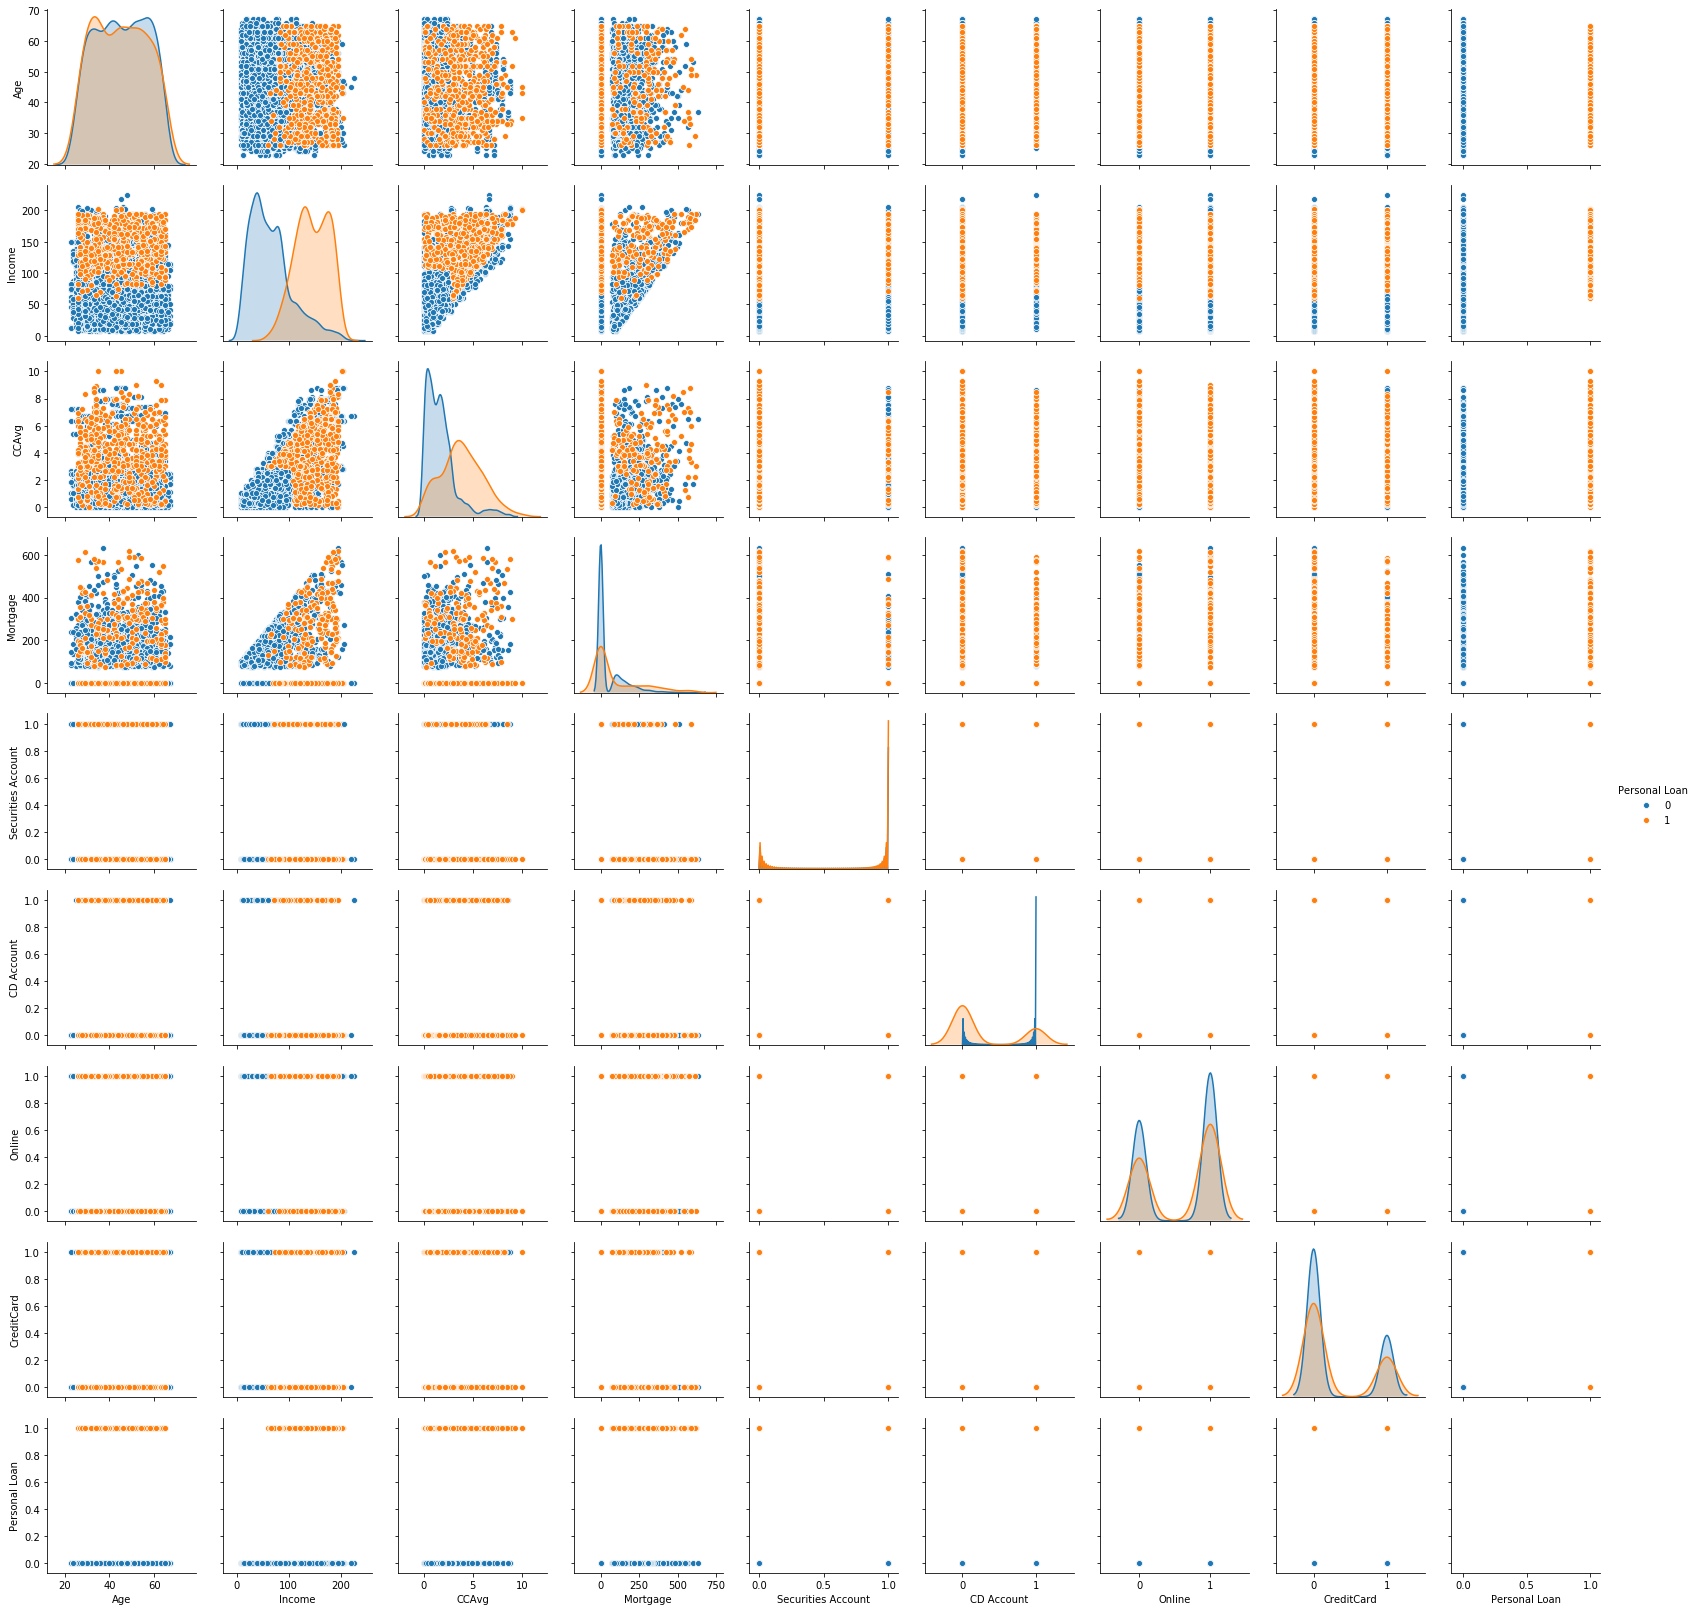

In [9]:
sb.pairplot(df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities Account',
                'CD Account', 'Online', 'CreditCard', 'Personal Loan']], hue='Personal Loan', diag_kind = 'kde')

### 2.c. Check Nulls

Analysis - Not a lot of null values / missing values in any of the columns

In [11]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 2.d. Heat map

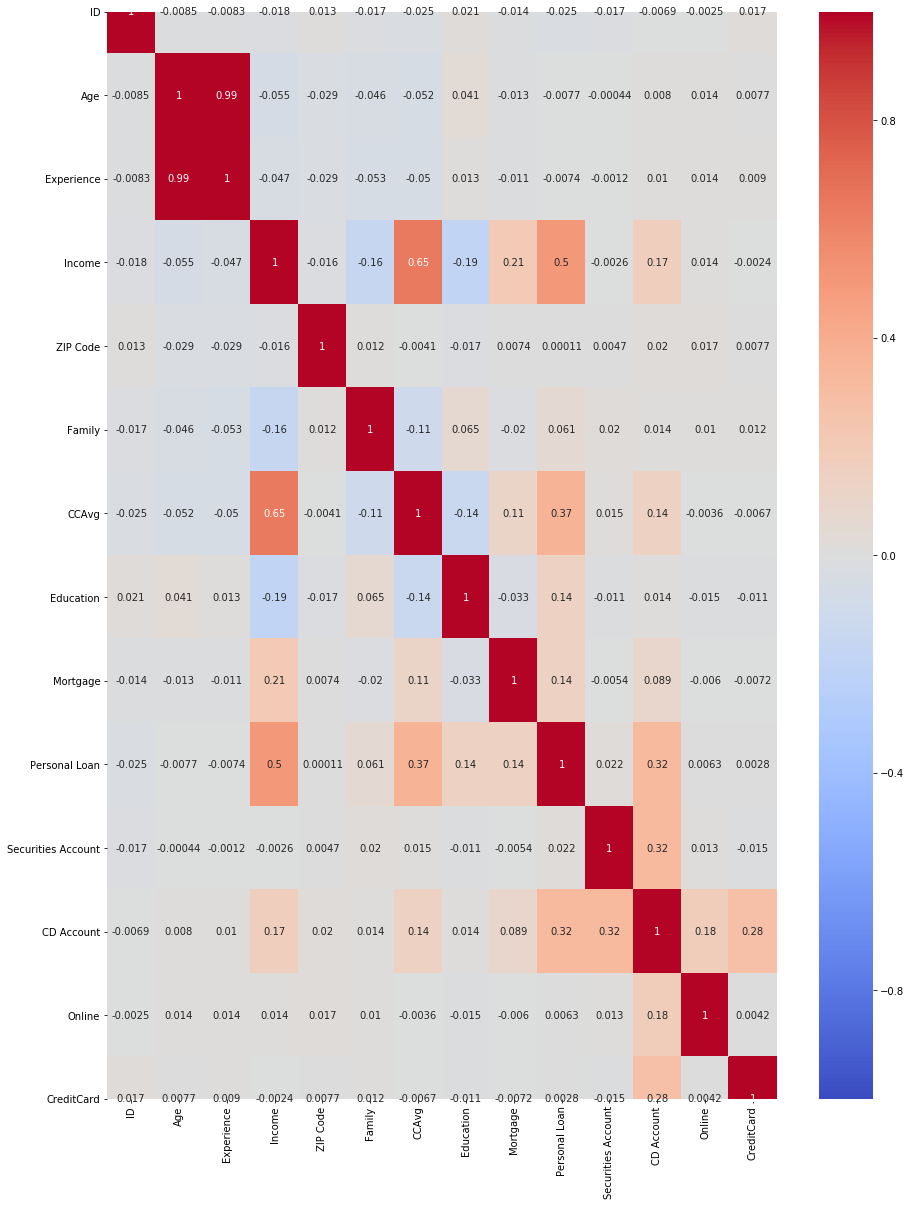

In [13]:
plt.figure (figsize = [15, 20])
sb.heatmap(df.corr(), annot=True, vmin=-1,
            cmap='coolwarm')

### 2.e. Unique values for key features

In [21]:
print('Age', sorted(df.Age.unique()))
print('CCAvg', sorted(df.CCAvg.unique()))
print('Family', sorted(df.Family.unique()))

Age [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
CCAvg [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.67, 0.7, 0.75, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.33, 1.4, 1.5, 1.6, 1.67, 1.7, 1.75, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.33, 2.4, 2.5, 2.6, 2.67, 2.7, 2.75, 2.8, 2.9, 3.0, 3.1, 3.2, 3.25, 3.3, 3.33, 3.4, 3.5, 3.6, 3.67, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.25, 4.3, 4.33, 4.4, 4.5, 4.6, 4.67, 4.7, 4.75, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.33, 5.4, 5.5, 5.6, 5.67, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.33, 6.4, 6.5, 6.6, 6.67, 6.7, 6.8, 6.9, 7.0, 7.2, 7.3, 7.4, 7.5, 7.6, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.5, 8.6, 8.8, 8.9, 9.0, 9.3, 10.0]
Family [1, 2, 3, 4]


## 3.  Feature Engineering

### 3.a. One Hot encoding for Age Category

In [23]:
df['AgeCat'] = list(pd.cut(np.array(df.Age), 3, labels=['minage', 'midage', 'maxage']))
df = pd.get_dummies(df, columns=['AgeCat'])

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,AgeCat_maxage,AgeCat_midage,AgeCat_minage
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,1,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0,1


In [27]:
df = df[['AgeCat_minage', 'AgeCat_midage', 'AgeCat_maxage', 'Income', 'CCAvg', 'Mortgage', 
         'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']]
df.head()

,AgeCat_minage,AgeCat_midage,AgeCat_maxage,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,0,0,49,1.6,0,1,0,0,0,0
1,0,1,0,34,1.5,0,1,0,0,0,0
2,0,1,0,11,1.0,0,0,0,0,0,0
3,1,0,0,100,2.7,0,0,0,0,0,0
4,1,0,0,45,1.0,0,0,0,0,1,0


### 3.b. Scale the ML Dataset 

In [28]:
#Scale the data for Income, CCAvg columns
scaler = MinMaxScaler()
dfscale = pd.DataFrame(scaler.fit_transform(df[['Income', 'CCAvg']]))
df['Income'] = dfscale[0]
df['CCAvg'] = dfscale[1]
df.head()

,AgeCat_minage,AgeCat_midage,AgeCat_maxage,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,0,0,0.189815,0.16,0,1,0,0,0,0
1,0,1,0,0.120370,0.15,0,1,0,0,0,0
2,0,1,0,0.013889,0.10,0,0,0,0,0,0
3,1,0,0,0.425926,0.27,0,0,0,0,0,0
4,1,0,0,0.171296,0.10,0,0,0,0,1,0


### 3.c. Scatter plots for Correlation

Inferences

1. Experience vs Income   : -0.0465
2. Experience vs Mortgage : -0.0106
3. Income vs Mortgage     : +0.2068

In [25]:
def Plot(x, y, label, c=('g', 'r'), s=30):
    d = pd.DataFrame()
    d['x'] = x
    d['y'] = y
    print('Corelation Constant : {0}'.format(d['x'].corr(d['y'])))
    figure = plt.figure(figsize=(10,5))
    ax = figure.add_subplot(111)
    plt.scatter(d['x'], d['y'], c=c,alpha=0.5, s=s, marker='*')
    ax.set_ylabel(label[0])
    ax.set_title(label[1])
    plt.show()
    plt.close(figure)
    
    return

Corelation Constant : 0.6459836696249656


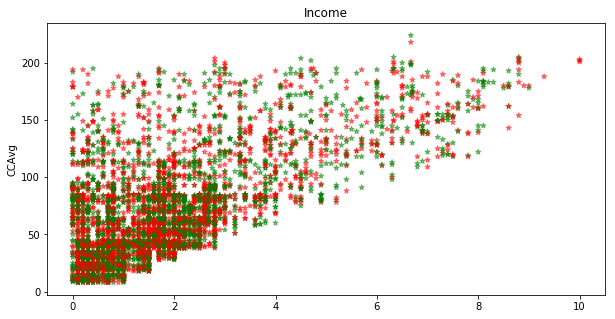

In [26]:
Plot(df['CCAvg'], df['Income'], label=('CCAvg', 'Income'))
# Positive Correlation

Corelation Constant : 0.10990472333483006


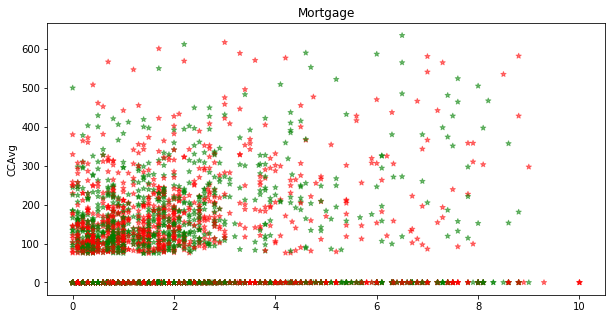

In [27]:
Plot(df['CCAvg'], df['Mortgage'], label=('CCAvg', 'Mortgage'))
# No Correlation

Corelation Constant : 0.20680622780317254


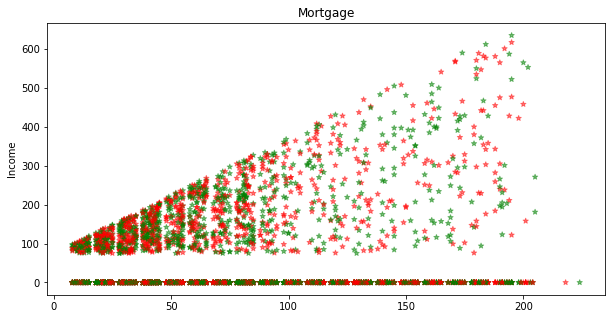

In [28]:
Plot(df['Income'], df['Mortgage'], label=('Income', 'Mortgage'))  

## 4. Model Development

### 4.a. Train / Test Split
Split dataframe based on 70% split with a random state of 100 for any initialization of radomness. 

In [29]:
X = df[['AgeCat_minage', 'AgeCat_midage', 'AgeCat_maxage', 'Income', 'CCAvg', 'Mortgage', 
        'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
len(X_train), len(y_train), len(X_test), len(y_test)

(3500, 3500, 1500, 1500)

In [30]:
X.head()

,AgeCat_minage,AgeCat_midage,AgeCat_maxage,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,0,0,49,1.6,0,1,0,0,0
1,0,1,0,34,1.5,0,1,0,0,0
2,0,1,0,11,1.0,0,0,0,0,0
3,1,0,0,100,2.7,0,0,0,0,0
4,1,0,0,45,1.0,0,0,0,0,1


### 4.b.  Model 1 -  Logistic Regression

In [31]:
lf = LogisticRegression()
lf.fit(X_train, y_train)
y_predict = lf.predict(X_test)

### 4.c. Support Vector Machine

In [32]:
clf = svm.SVC(gamma=0.025, C=1)    
clf.fit(X_train , y_train)
y_pred_svm = clf.predict(X_test)

### 4.d. Navie Bayes

In [34]:
nblf = GaussianNB()
nblf .fit(X_train, y_train)
y_pred_nb = nblf.predict(X_test)

### 4.e. KNN

In [35]:
knnlf = KNeighborsClassifier(n_neighbors= 5)
knnlf.fit(X_train, y_train)
y_pred_nnh = knnlf.predict(X_test)

## 5. Model Evaluation

### 5.a.  Model Scores

In [36]:
print( 'Logistic Regression Score - {0}'.format(lf.score(X_test, y_test)))
print( 'Support Vector Model - {0}'.format(clf.score(X_test, y_test)))
print( 'Navie Bayes Score - {0}'.format(nblf.score(X_test, y_test)))
print( 'KNN Score - {0}'.format(knnlf.score(X_test, y_test)))

Logistic Regression Score - 0.916
Support Vector Model - 0.8993333333333333
Navie Bayes Score - 0.8706666666666667
KNN Score - 0.898


### 5.b. Confusion Matrix

In [37]:
print( 'Logistic Regression Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_predict))
print( 'Support Vector Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred_svm))
print( 'Navie Bayes Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred_nb))
print( 'KNN Confusion Matrix') 
print(metrics.confusion_matrix(y_test, y_pred_nnh))

Logistic Regression Confusion Matrix
[[1310   32]
 [  94   64]]
Support Vector Confusion Matrix
[[1326   16]
 [ 135   23]]
Navie Bayes Confusion Matrix
[[1210  132]
 [  62   96]]
KNN Confusion Matrix
[[1298   44]
 [ 109   49]]


### 5.c. Precision vs Recall 

In [38]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print( 'Logistic Regression Recall / Precision') 
print(recall_score(y_test, y_predict), precision_score(y_test, y_predict))

print( 'SVM Recall / Precision') 
print(recall_score(y_test, y_predict), precision_score(y_test, y_pred_svm))


print( 'Navie Bayes Recall / Precision') 
print(recall_score(y_test, y_predict), precision_score(y_test, y_pred_nb))


print( 'KNN Recall / Precision') 
print(recall_score(y_test, y_predict), precision_score(y_test, y_pred_nnh))

Logistic Regression Recall / Precision
0.4050632911392405 0.6666666666666666
SVM Recall / Precision
0.4050632911392405 0.5897435897435898
Navie Bayes Recall / Precision
0.4050632911392405 0.42105263157894735
KNN Recall / Precision
0.4050632911392405 0.5268817204301075


## 6. Results 

Best Model:  logistic regression

[92% of accuracy]

[76% of Precision]

[37% of Recall]

In [40]:
d = pd.DataFrame(y_test)
len(d), len(d[d['Personal Loan'] == 1]), len(d[d['Personal Loan'] == 0]), 

(1500, 158, 1342)